<a href="https://colab.research.google.com/github/Martin-Msb/context-aware-recommendation/blob/main/context_aware_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This research notebook is part of DAMI II course at DSV

### Authors: © 2022 Martin Masaba & Edda Waciira

Install Kaggle library

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

In [ ]:
#Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggleAPI/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [03:33<00:00, 172MB/s]
100% 28.7G/28.7G [03:33<00:00, 145MB/s]


In [ ]:
!unzip h-and-m-personalized-fashion-recommendations

Streaming output truncated to the last 5000 lines.
  inflating: images/089/0890677001.jpg  
  inflating: images/089/0890677002.jpg  
  inflating: images/089/0890677004.jpg  
  inflating: images/089/0890683001.jpg  
  inflating: images/089/0890683002.jpg  
  inflating: images/089/0890684001.jpg  
  inflating: images/089/0890684002.jpg  
  inflating: images/089/0890686002.jpg  
  inflating: images/089/0890697001.jpg  
  inflating: images/089/0890697002.jpg  
  inflating: images/089/0890700001.jpg  
  inflating: images/089/0890717001.jpg  
  inflating: images/089/0890717002.jpg  
  inflating: images/089/0890717003.jpg  
  inflating: images/089/0890722001.jpg  
  inflating: images/089/0890722002.jpg  
  inflating: images/089/0890734001.jpg  
  inflating: images/089/0890734003.jpg  
  inflating: images/089/0890741001.jpg  
  inflating: images/089/0890745001.jpg  
  inflating: images/089/0890746001.jpg  
  inflating: images/089/0890766001.jpg  
  inflating: images/089/0890766002.jpg  
  infl

In [ ]:
#download specific file
#!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f fname.csv

In [54]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customers_df = pd.read_csv('customers.csv')

In [ ]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [ ]:
member_status = pd.DataFrame(customers_df['club_member_status'].value_counts()/customers_df['club_member_status'].shape[0] * 100)
member_status

,club_member_status
ACTIVE,92.748509
PRE-CREATE,6.775609
LEFT CLUB,0.034038


'pre-create' and 'left-club' seems to be very small groups, so we can drop the rows

In [ ]:
customers_df.drop(customers_df.index[customers_df['club_member_status'] != 'ACTIVE'], inplace=True)

customers_df.club_member_status.value_counts()

ACTIVE    1272491
Name: club_member_status, dtype: int64

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272491 entries, 0 to 1371978
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1272491 non-null  object 
 1   FN                      470826 non-null   float64
 2   Active                  458452 non-null   float64
 3   club_member_status      1272491 non-null  object 
 4   fashion_news_frequency  1260566 non-null  object 
 5   age                     1266255 non-null  float64
 6   postal_code             1272491 non-null  object 
dtypes: float64(3), object(4)
memory usage: 77.7+ MB


In [ ]:
fashion_news = pd.DataFrame(customers_df['fashion_news_frequency'].value_counts()/customers_df['fashion_news_frequency'].shape[0] * 100)
fashion_news

,fashion_news_frequency
NONE,61.963660
Regularly,37.037904
Monthly,0.061140
None,0.000157


'Monthly' and 'None' rows are few so we can drop them

In [ ]:
customers_df.drop(customers_df.index[customers_df['fashion_news_frequency'] == 'None'], inplace=True)
customers_df.drop(customers_df.index[customers_df['fashion_news_frequency'] == 'Monthly'], inplace=True)
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Name: fashion_news_frequency, dtype: int64

In [ ]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan], dtype=object)

In [ ]:
avg_age = customers_df.age.mean()
max_age = customers_df.age.max()
min_age = customers_df.age.min()

print('The average age is {}, the max age is {} and the min age is {}'
      .format(avg_age, max_age, min_age))


The average age is 36.075925580572054, the max age is 99.0 and the min age is 16.0


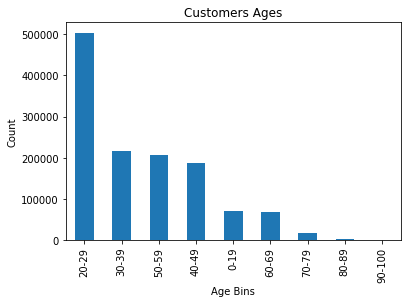

In [ ]:
bins = 0, 19, 29, 39, 49, 59, 69, 79,89,100
customers_df['age_bins'] = pd.cut(customers_df.age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])


customers_df.age_bins.value_counts().plot(kind = 'bar', title = 'Customers Ages', xlabel = 'Age Bins', ylabel= 'Count')


In [ ]:
#Should drop some ages here
age_bins = pd.DataFrame(customers_df['age_bins'].value_counts()/customers_df['age_bins'].shape[0] * 100)
age_bins

,age_bins
20-29,39.669469
30-39,16.915321
50-59,16.201794
40-49,14.594354
0-19,5.525705
60-69,5.229333
70-79,1.267033
80-89,0.100180
90-100,0.006527


In [ ]:
customers_df = customers_df.drop(customers_df[(customers_df['age'] >= 50) | (customers_df['age'] <= 20)].index)

In [ ]:
customers_df.age_bins.value_counts()

20-29     450858
30-39     215114
40-49     185598
0-19           0
50-59          0
60-69          0
70-79          0
80-89          0
90-100         0
Name: age_bins, dtype: int64

In [ ]:
#drop unnecessary columns
customers_df.drop(['age_bins', 'postal_code'], axis = 1, inplace =True)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,NONE,29.0
...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0


In [ ]:
#Should drop FN & Active?
customers_df.describe()

,FN,Active,age
count,302323.0,293971.0,851570.000000
mean,1.0,1.0,31.339367
std,0.0,0.0,8.538533
min,1.0,1.0,21.000000
25%,1.0,1.0,24.000000
50%,1.0,1.0,29.000000
75%,1.0,1.0,37.000000
max,1.0,1.0,49.000000


In [ ]:
train_df = pd.read_csv('transactions_train.csv')

In [ ]:
train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
#Transaction Train
#Models to evaluate
#image data

In [44]:
articles_df = pd.read_csv('articles.csv')

In [47]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [59]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [48]:
os.getcwd()

'/content'

In [49]:
images_root = r'/content/images'

In [50]:
#Returns dir, sub-dirs & image file paths
root_dirs = []
sub_dirs = []
image_files = []

for roots, sub_dir, files in os.walk(images_root):
  for file in files:
    if file.endswith(".jpg"):
      root_dirs.append(roots)
      sub_dirs.append(os.path.join(roots, file))
      image_files.append(file)

In [51]:
image_files

['0290022001.jpg',
 '0293433029.jpg',
 '0291333013.jpg',
 '0293510002.jpg',
 '0294008056.jpg',
 '0296366034.jpg',
 '0296476014.jpg',
 '0291338032.jpg',
 '0291338023.jpg',
 '0293244001.jpg',
 '0293510018.jpg',
 '0296366031.jpg',
 '0299841004.jpg',
 '0293433048.jpg',
 '0296375018.jpg',
 '0292453034.jpg',
 '0293433043.jpg',
 '0291338005.jpg',
 '0293433009.jpg',
 '0293433046.jpg',
 '0291338035.jpg',
 '0291333012.jpg',
 '0293510015.jpg',
 '0297078005.jpg',
 '0291333019.jpg',
 '0296476009.jpg',
 '0293433057.jpg',
 '0297898002.jpg',
 '0297796002.jpg',
 '0292453011.jpg',
 '0292453025.jpg',
 '0292551012.jpg',
 '0296476008.jpg',
 '0299668015.jpg',
 '0299733001.jpg',
 '0296476017.jpg',
 '0293433049.jpg',
 '0296476019.jpg',
 '0294008009.jpg',
 '0292551001.jpg',
 '0293433021.jpg',
 '0297078002.jpg',
 '0293433042.jpg',
 '0294895011.jpg',
 '0291338031.jpg',
 '0291957009.jpg',
 '0290519024.jpg',
 '0291957007.jpg',
 '0291338025.jpg',
 '0291333023.jpg',
 '0293433054.jpg',
 '0292551014.jpg',
 '0293433050

In [61]:
counter = 0
for item in image_files:
 counter+=1
print('The number of images in the images folder are:', counter)

The number of images in the images folder are: 105100
